# Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
# let's grab this dataset described in the url
df = pd.read_csv(url)

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [7]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['date', 'day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

## Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [8]:
def get_fences(df, col, k=1.5):
    '''
    get_fences takes in a dataframe and a string literal
    df, a pandas dataframe
    k, an integer representing the fence for our method
    col, a string literal represening a column name
    returns the lower and upper fences of a series
    '''
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower_fence = q1 - iqr*k
    upper_fence = q3 + iqr*k
    return lower_fence, upper_fence

## Using lemonade.csv dataset and focusing on continuous variables:

#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [11]:
numeric_cols = ['temperature','rainfall','flyers','price', 'sales']
my_fences = {}
for col in df[numeric_cols]:
    my_fences[col] = get_fences(df,col,k=1.5)

In [14]:
my_fences

{'temperature': (16.700000000000003, 104.7),
 'rainfall': (0.26, 1.3),
 'flyers': (4.0, 76.0),
 'price': (0.5, 0.5),
 'sales': (5.0, 45.0)}

In [27]:
(df.temperature < 16.7).value_counts()

False    364
True       1
Name: temperature, dtype: int64

In [18]:
df.rainfall.sort_values().head()

185    0.40
181    0.47
207    0.47
166    0.47
202    0.47
Name: rainfall, dtype: float64

In [17]:
df.flyers.sort_values().head()

324   -38
364     9
338    11
343    15
27     15
Name: flyers, dtype: int64

In [23]:
(df.sales < 5).value_counts()

False    365
Name: sales, dtype: int64

- The lower **temperature** outlier fence does seem to be a good anomoly indicator, **I would remove the single outlier below this outlier fence**

- The lower **rainfall** outlier fence is not a good anomoly indicator unless this dataset was built specifically to analyze lemonade sales on rainy days. This is a posibility because there are 0 days without rain in this dataset. I will side with caution and **not remove these,** conveniently, there are no values here that low anyways. 


- The lower **flyers** outlier fence does seem to be a a good anomoly indicator, as the std dev for this feature is relatively low, and the 25th percetile of that feature is over 7x the value of this lower outlier fence value of 4. When observing the sorted values of the feature, we see a -38 value- not sure how you can distribute a negative number of flyers! **I would remove lower outliers here.**  


- The lower **price** outlier fence is not a a good anomoly indicator at all, the price value is unchanged throughout the entire dataset - **I would not remove these.**


- The lower **sales** outlier fence does seem to be a good anomoly indicator, however I dont feel comfortable removing this feature  as the standard deviation for this feature is greater than the mean, and a negative value for this feature is nonsensical. **I would not remove these.**

#### Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [29]:
df.describe()

,temperature,rainfall,flyers,price,sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [28]:
my_fences

{'temperature': (16.700000000000003, 104.7),
 'rainfall': (0.26, 1.3),
 'flyers': (4.0, 76.0),
 'price': (0.5, 0.5),
 'sales': (5.0, 45.0)}

In [37]:
df.sales.sort_values(ascending=False)

184    534
183    235
182    158
181    143
207     43
      ... 
5       11
343     11
0       10
338     10
364      7
Name: sales, Length: 365, dtype: int64

- The upper **temperature** outlier fence looks like a very comfortable place to identify anomolous values, as there seems to be at least 1 erroneous value here with a tempurture of 212 degrees. **I would remove that outlier** 


- The upper **rainfall** outlier fence does not seem like a good identifier of anomolous values, as almost 10% of the dataset contains rainfalls values beyond that. **I would not remove these**


- The upper **flyers** outlier fence looks like a pretty reasonable place to identify anomolies. Only 2 days of the year we're that many flyers handed out. **I would remove outliers here.**  


- The upper **price** outlier fence is still not a identifier of anomoly, price is consistant ant that value throughout.  **I would (obviously) not remove these.**


- The upper **sales** outlier fence looks like a comfortable place to identify anolous values. Only 4 days of the year had sales figures above that line, and those values are WAY above that line **I would remove these.**

#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [38]:
numeric_cols = ['temperature','rainfall','flyers','price', 'sales']
my_fences = {}
for col in df[numeric_cols]:
    my_fences[col] = get_fences(df,col,k=3)

In [39]:
my_fences

{'temperature': (-16.299999999999997, 137.7),
 'rainfall': (-0.13, 1.69),
 'flyers': (-23.0, 103.0),
 'price': (0.5, 0.5),
 'sales': (-10.0, 60.0)}

- None of these make sense. 

#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

- None of these make sense. 

## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

### Use a 2 sigma decision rule to isolate the outliers

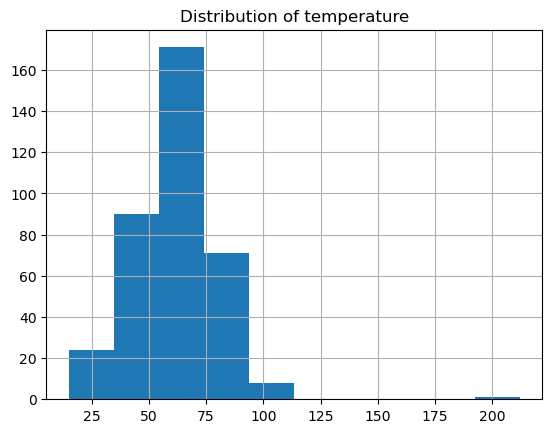

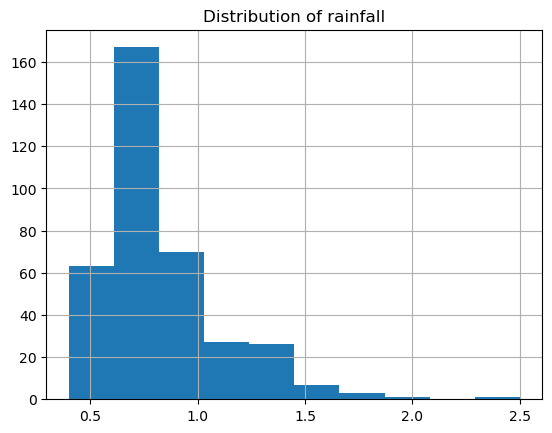

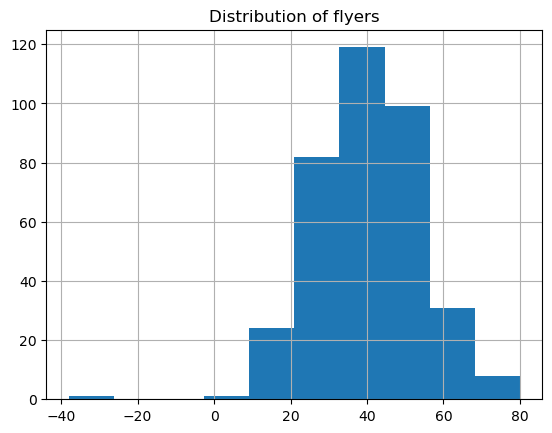

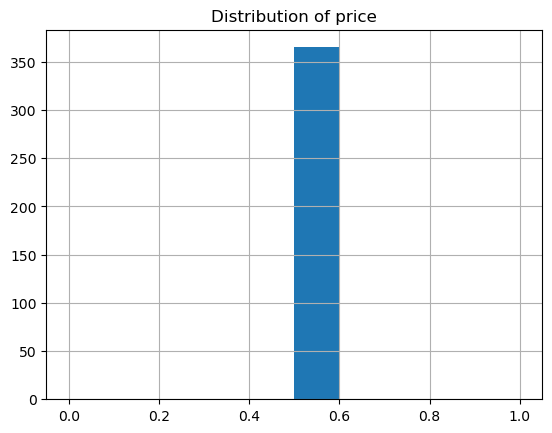

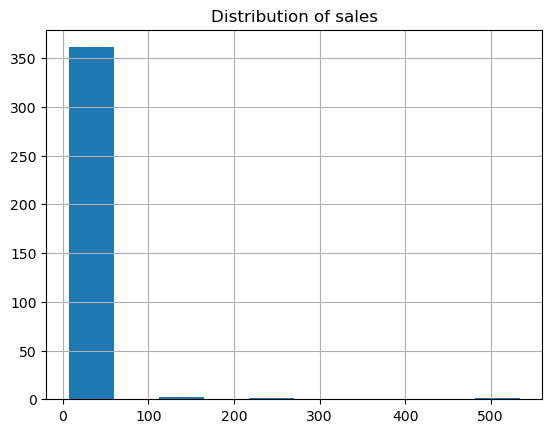

In [44]:
# brief visual analysis:
for col in df[numeric_cols]:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

In [45]:
normally_dist_cols = ['temperature','rainfall','flyers']
my_fences = {}
for col in df[normally_dist_cols]:
    my_fences[col] = get_fences(df,col,k=2)

In [46]:
my_fences

{'temperature': (5.700000000000003, 115.7),
 'rainfall': (0.13, 1.4300000000000002),
 'flyers': (-5.0, 85.0)}

#### Do these make sense?

- No, I would not use this method to distinguish anomolies for this dataset

#### Should certain outliers be kept or removed?

- Not using this method!

## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [48]:
my_fences = {}
for col in df[normally_dist_cols]:
    my_fences[col] = get_fences(df,col,k=3)

In [50]:
my_fences

{'temperature': (-16.299999999999997, 137.7),
 'rainfall': (-0.13, 1.69),
 'flyers': (-23.0, 103.0)}